# Neuronal Network from Scratch with Numpy
In this notebook we develop a neural network from scratch using only Numpy. We develop the code based on the excellent [tutorial](https://victorzhou.com/blog/intro-to-neural-networks/) by Victor Zhou.

## The Activation Function
As activation function we use the sigmoid function $\sigma(x) = \frac{1}{1+e^{-x}}$. The derivative of the sigmoid function is $\sigma'(x) = \sigma(x)\cdot (1-\sigma(x))$.

## The Data
We have given persons with weight, height and gender. The neuronal network should now learn to predict the gender for a given weight and height.

## The Network Architecture
<img src="img/nn_1.png" style="height:250px">

## Loss Function
As loss-function we use the Mean Squared Error $L=\frac{1}{n}\sum_{i=1}^n (y-\hat{y})^2$, with $\hat{y}=o_1$ beeing the predicted labels (genders) and $y$ beeing the given labels of the training set.

## Feed Forward
$
  \begin{split}
    h_1 &= \sigma(w_1 x_1 + w_2 x_2 + b_1)\\
    h_2 &= \sigma(w_3 x_1 + w_4 x_2 + b_2)\\
    o_1 &= \sigma(w_5 h_1 + w_6 h_2 + b_3)
  \end{split}
$

## Gradient Decent
Our goal is to understand how the costfunction $L(w_1,w_2,w_3,w_4,w_5,w_6,b_1,b_2,b_3)$ changes with respect to all the weights and biasis. That way we know which adjustments to those terms lead to the most efficient decrease of it.

So let's start with $w_6$ and $w_5$. How do we have to change $w_6$ respective $w_5$ to decrease the cost function $L$? This question can be answered by the partial derivative $\frac{\partial L}{\partial w_6}$ respective $\frac{\partial L}{\partial w_5}$.

$
  \begin{split}
    \frac{\partial L}{\partial w_6} &= \color{red}{\frac{\partial L}{\partial \hat{y}}} \color{green}{\frac{\partial \hat{y}}{\partial w_6}}\\
    \color{red} {\frac{\partial L}{\partial \hat{y}}} &= \frac{\partial (y-\hat{y})^2}{\partial \hat{y}} = -2(y-\hat{y})\\
    \color{green}{\frac{\partial \hat{y}}{w_6}} &= \frac{\partial \sigma(w_5 h_1 + w_6 h_2 + b_3)}{\partial w_6} = h_2 \sigma'(w_5 h_1 + w_6 h_2 + b_3)\\
    \rightarrow \frac{\partial L}{\partial w_6} &= \color{red}{-2(y-\hat{y})} \color{green}{h_2 \sigma'(w_5 h_1 + w_6 h_2 + b_3)}
  \end{split}
$

Similarly $\frac{\partial L}{\partial w_5}$ can be derived.

$
  \frac{\partial L}{\partial w_5} = -2(y - \hat{y}) h_1 \sigma'(w_5 h_1 + w_6 h_2 + b_3)
$<br><br>

In the next step we must now derive $\frac{\partial L}{\partial w_4}, \frac{\partial L}{\partial w_3},\frac{\partial L}{\partial w_2} $ and $\frac{\partial L}{\partial w_1}$.

$
  \begin{split}
    \frac{\partial L}{\partial w_4} &= \color{red}{\frac{\partial L}{\partial \hat{y}}} \color{green}{\frac{\partial \hat{y}}{\partial w_4}}\\
    \color{red}{\frac{\partial L}{\partial \hat{y}}} &= \frac{\partial (y-\hat{y})^2}{\partial \hat{y}} = -2(y-\hat{y})\\
    \color{green}{\frac{\partial \hat{y}}{\partial w_4}} &\overset{*}{=} \color{orange}{\frac{\partial \hat{y}}{h_2}} \color{blue}{\frac{\partial h_2}{\partial w_4}}\\
    \color{orange}{\frac{\partial \hat{y}}{\partial h_2}} &= \frac{\partial \sigma(w_5 h_1 + w_6 h_2 + b_3)}{\partial h_2} = w_6 \sigma'(w_5 h_1 + w_6 h_2 + b_3)\\
    \color{blue}{\frac{\partial h_2}{\partial w_4}} &= x_2 \sigma'(w_3 x_1 + w_4 x_2 + b_2)\\
    \rightarrow \frac{\partial L}{\partial w_4} &= \color{red}{-2(y-\hat{y})}\color{orange}{w_6 \sigma'(w_5 h_1 + w_6 h_2 + b_3)}\color{blue}{x_2 \sigma'(w_3 x_1 + w_4 x_2 + b_2)}
  \end{split}
$

$*)$ Because $w_4$ only influences $h_2$ and not $h_1$.

Similarly $\frac{\partial L}{\partial w_3},\frac{\partial L}{\partial w_2} $ and $\frac{\partial L}{\partial w_1}$ can be derived.

$
  \begin{split}
    \frac{\partial L}{\partial w_3} &= -2(y-\hat{y})w_6\sigma'(w_5 h_1 + w_6 h_2 + b_3)x_1\sigma'(w_3 x_1 + w_4 x_2 + b_2)\\
    \frac{\partial L}{\partial w_2} &= -2(y-\hat{y})w_5\sigma'(w_5 h_1 + w_6 h_2 + b_3)x_2\sigma'(w_1 x_1 + w_2 x_2 + b_1)\\
    \frac{\partial L}{\partial w_1} &= -2(y-\hat{y})w_5\sigma'(w_5 h_1 + w_6 h_2 + b_3)x_1\sigma'(w_1 x_1 + w_2 x_2 + b_1)
  \end{split}
$<br><br>

Finally we have to derive $\frac{\partial L}{\partial b_3}$, $\frac{\partial L}{\partial b_2}$ and $\frac{\partial L}{\partial b_1}$. $\frac{\partial L}{\partial b_3}$ can be derived similarly to $\frac{\partial L}{\partial w_6}$.
$
  \frac{\partial L}{\partial b_3} = -2(y-\hat{y})\sigma'(w_5 h_1 + w_6 h_2 + b_3)
$

And $\frac{\partial L}{\partial b_2}$ can be derived similarly to $\frac{\partial L}{\partial w_4}$ while $\frac{\partial L}{\partial b_1}$ can be derived similarly to $\frac{\partial L}{\partial w_2}$.
$
  \begin{split}
    \frac{\partial L}{\partial b_2} &= -2(y-\hat{y})w_6\sigma'(w_5 h_1 + w_6 h_2 + b_3)\sigma'(w_3 x_1 + w_4 x_2 + b_2)\\
    \frac{\partial L}{\partial b_1} &= -2(y-\hat{y})w_5\sigma'(w_5 h1 + w_6 h_2 + b_3)\sigma'(w_1 x_1 + w_2 x_2 + b_1)
  \end{split}
$

## So, how do we train the Network? Backpropagation!
We now have everything together to train our neural network. We use an algorithm called stochastic gradient descent (SGD) to calculate how to change our weights and biases to minimize loss. The SGD proceeds as follows.

1. Chose randomly one sample from the trainingset.
2. Update all weights and biases using the following equation. $\eta$ is the learning rate which controls the training speed.

$$
  \begin{split}
    w_i &= w_i - \eta \frac{\partial L}{w_i} \text{ for all } i\in[1,6]\\
    b_j &= b_j - \eta \frac{\partial L}{b_j} \text{ for all } j\in [1,3]
  \end{split}
$$

3. Go to step 1.



## The Code

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The Datasets & Preprocessing

In [2]:
training_data = pd.DataFrame({'name':   ['Alice', 'Bob', 'Charlie', 'Diana'],
                              'weight': [133, 160, 152, 120],
                              'height': [65, 72, 70, 60],
                              'gender': ['F', 'M', 'M', 'F']})
print('training_data:')
print(training_data)

# replace 'F' with 1 and 'M' with 0
training_data['gender'].replace(to_replace=['F','M'], value=[1,0], inplace=True)

# normalize weight and height
for i in ['weight', 'height']:
  training_data[i] = (training_data[i] - 
                             training_data[i].mean())\
                           / training_data[i].std()

data = training_data[['weight', 'height']].to_numpy()

all_y_trues = training_data['gender'].to_numpy()

prediction_data = pd.DataFrame({'name':   ['Emily', 'Frank'],
                                'weight': [128, 155],
                                'height': [63, 68]})
print('\nprediction_data:')
print(prediction_data)

# normalize weight and height
for i in ['weight', 'height']:
  prediction_data[i] = (prediction_data[i] - 
                             prediction_data[i].mean())\
                           / prediction_data[i].std()

pred_data = prediction_data.to_numpy()

training_data:
      name  weight  height gender
0    Alice     133      65      F
1      Bob     160      72      M
2  Charlie     152      70      M
3    Diana     120      60      F

prediction_data:
    name  weight  height
0  Emily     128      63
1  Frank     155      68


### Code for the Neuronal Network

Epoch 0 loss: 0.381
Epoch 20 loss: 0.260
Epoch 40 loss: 0.163
Epoch 60 loss: 0.119
Epoch 80 loss: 0.089
Epoch 100 loss: 0.067
Epoch 120 loss: 0.052
Epoch 140 loss: 0.041
Epoch 160 loss: 0.033
Epoch 180 loss: 0.027
Epoch 200 loss: 0.023
Epoch 220 loss: 0.019
Epoch 240 loss: 0.017
Epoch 260 loss: 0.015
Epoch 280 loss: 0.013
Epoch 300 loss: 0.012
Epoch 320 loss: 0.011
Epoch 340 loss: 0.010
Epoch 360 loss: 0.009
Epoch 380 loss: 0.008
Epoch 400 loss: 0.007
Epoch 420 loss: 0.007
Epoch 440 loss: 0.006
Epoch 460 loss: 0.006
Epoch 480 loss: 0.006
Epoch 500 loss: 0.005
Epoch 520 loss: 0.005
Epoch 540 loss: 0.005
Epoch 560 loss: 0.005
Epoch 580 loss: 0.004
Epoch 600 loss: 0.004
Epoch 620 loss: 0.004
Epoch 640 loss: 0.004
Epoch 660 loss: 0.004
Epoch 680 loss: 0.003
Epoch 700 loss: 0.003
Epoch 720 loss: 0.003
Epoch 740 loss: 0.003
Epoch 760 loss: 0.003
Epoch 780 loss: 0.003
Epoch 800 loss: 0.003
Epoch 820 loss: 0.003
Epoch 840 loss: 0.003
Epoch 860 loss: 0.003
Epoch 880 loss: 0.002
Epoch 900 loss: 

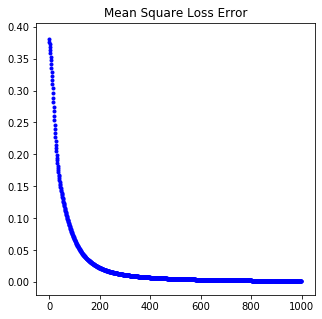

Emily 0.9675447684627551
Frank 0.04440184098894103


In [3]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class NeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    # plot loss during training
    fig1, ax1 = plt.subplots(figsize=(5,5))
    ax1.set_title('Mean Square Loss Error')

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss
      # get predictions for all samples from data
      # apply feedforward along x axis
      y_preds = np.apply_along_axis(self.feedforward, 1, data)
      loss = mse_loss(all_y_trues, y_preds)
      ax1.scatter(epoch, loss, marker='.', c='b')
      if epoch % 20 == 0:
        print("Epoch %d loss: %.3f" % (epoch, loss))
    plt.show()

# Train our neural network!
network = NeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
y_preds = np.apply_along_axis(network.feedforward, 1, pred_data[:,1:3])
for i in range(len(y_preds)):
  print(pred_data[i,0], y_preds[i])